# BOOTSTRAPPING
- There is an original dataset.
- Create a new dataset that randomly selects values from the original dataset.
- The new dataset will have the same number of values as the original dataset.


Sampling with Replacement: Randomly selecting data and allowing for duplicates.

Bootstrapped Dataset: A dataset that was created using sampling with replacement. It has the same number of values as the original dataset.


Bootstrapping:
1. Make a bootstrapped dataset
2. Calculate somthing (mean, median, std, ... ,)
3. Keep track of that calculation
4. Repeat steps 1-3.


After calculate the mean from 1000 bootstrapped datasets, form a histogram of means. Tells us how the mean might change if we redid the experiement a bunch of times.


Standard Error: Calculate the standard deviation of the bootstrapped means will give you the Standard Error of the mean from the original dataset.

95% Confidence interval: An interval that covers 95% of the bootstrapped means. 
    Ex: The 95% of the confidence covers 0, so the drug is not doing anything.
    

Hypothesis Testing



Bootstrapping results in better confidence intervals. Useful for creating a histogram of what might happen if we repeated the experiment a bunch of times. That histogram will help us calculate confidence intervals and Standard Errors without a formula.

https://www.youtube.com/watch?v=Xz0x-8-cgaQ

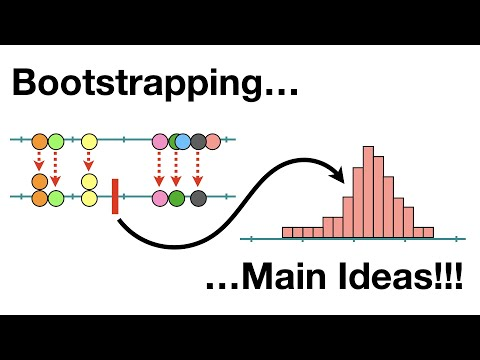

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)


# 1 
Standard Deviation: The variability of individual data points. 

Standard Error (The STD of the sample mean if we took different samples): The variablility of the sample man.

Standard error is always smaller than the orignal standard deviation because it factors in sample size.

A larger sample size more accurately represents the population, so the standard error gets smaller because the sample mean is more accurate. 

Standard error is used when making inferences about the population mean. It is a confidence interval. 

# 2
To calculate the confidence interval, find the 2.5th percentile and the 97.5 percentile of the bootstrapped means. The mean of the population is likely to fall between these two percentiles.


Calculate the Standard Error by finding the std of your bootstrapped sample means. 
The lowerbound = sample.mean() - bootstrapped_sample_means.std() * 1.96 
The upperbound = sample.mean() + bootstrapped_sample_means.std() * 1.96 

Alternatively, 
Find the mean of your sample data: 
Calculate the Standard error of mean: SEM = (SD / sqrt(n)) 
Determine the critical value (t* or z-score): 
Calcualte the Margin of Error: (t*) * (SEM)
Create the Confidence Interval: 
    - Lower_bound: (mean) - (Margin of Error)    
    - upper_bound: (mean) + (Margin of Error)

In [180]:
from scipy import stats
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns


In [134]:
# Population
population_parameter_mu_μ = 0
population_parameter_sigma_σ = 1
normal_distribution = stats.norm(loc=population_parameter_mu_μ, 
                                 scale=population_parameter_sigma_σ) 
# Sample
n = 100 # adjust and experiment with this
# np.random.seed(130)
x = normal_distribution.rvs(size=n) # "x" is the sample of size "n"
# print(x) # uncomment this if you also want to see the sample 

# Mean
print("The sample mean for the current sample is", x.mean()) 
# the sample mean "x-bar" is a (sample) "statistic" (not a "parameter")
# "x-bar" is the "average" of the numbers in a sample

The sample mean for the current sample is 0.13140222849102354


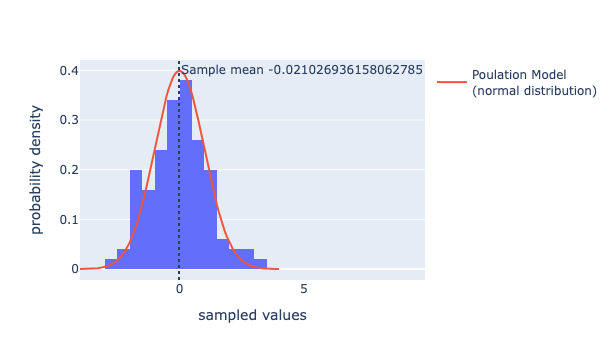

In [144]:
# This code visualizes the population being sampled from (as a red line),
# a sample from this population (as a histogram), and the sample mean

# create another sample
n = 100 # adjust and experiment with this
# np.random.seed(130)
x = normal_distribution.rvs(size=n) # "x" is the sample of size "n"

# create a histogram of the sample and annotate the sample mean
fig = px.histogram(pd.DataFrame({'sampled values': x}), x='sampled values',
                   histnorm='probability density') # so the scale matches the pdf below
fig.add_vline(x=x.mean(), line_dash="dot", annotation_text='Sample mean '+str(x.mean()))

# add population visualization into the figure
support = np.linspace(-4,4,100) 
fig.add_trace(go.Scatter(mode='lines', name='Poulation Model<br>(normal distribution)',
                         y=normal_distribution.pdf(support), x=support))
                                             # pdf means "probability density function"
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS  

In [214]:
# What is this doing?

number_of_simulations = 1000 # adjust and experiment with this
simulated_means = np.zeros(number_of_simulations)
simulated_median = np.zeros(number_of_simulations)
simulated_std = np.zeros(number_of_simulations)
simulated_mode = np.zeros(number_of_simulations)

# np.random.seed(130) # ?
n = 100 # adjust and experiment with this
for i in range(number_of_simulations):
    # np.random.seed(130) # ?
    simulated_data = stats.norm(loc=0, scale=1).rvs(size=n)
    simulated_means[i] = simulated_data.mean()
    simulated_median[i] = np.percentile(simulated_data, 50)
    simulated_std[i] = simulated_data.std()


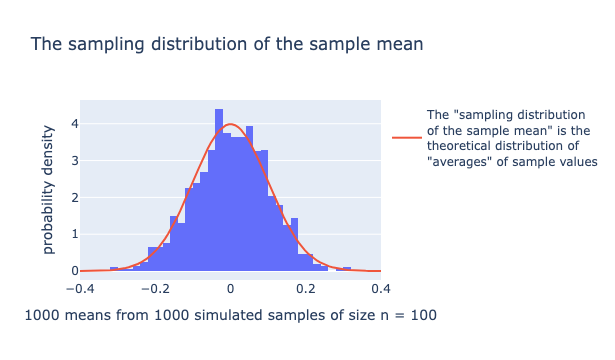

In [148]:
# This time the code creates a histogram of example simulations of sample means
# and visualizes the theoretical distribution of the sample means (as a red line)
    
title1 = "The sampling distribution of the sample mean"
title2 = str(number_of_simulations)+' means from '+str(number_of_simulations)+' simulated samples of size n = '+str(n)
fig = px.histogram(pd.DataFrame({title2: simulated_means}), title=title1, x=title2, 
                   histnorm='probability density')    

# add a visualization of "the sampling distribution of the sample mean" into the figure
support = 4*np.array([-1,1])/np.sqrt(n) # the support code here automatically chooses
support = np.linspace(support[0], support[1], 100) # the plotting range for the x-axis
legend = 'The "sampling distribution<br>of the sample mean" is the<br>theoretical distribution of<br>"averages" of sample values'
fig.add_trace(go.Scatter(mode='lines', name=legend, x=support, 
                         y=stats.norm(0,scale=1/np.sqrt(n)).pdf(support)))
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [196]:
print("Sample mean", x.mean())
print("Mean of means:", simulated_means.mean())
print("Standard Error", simulated_means.std())
print("Confidence Interval", np.percentile(simulated_means, 2.5), 
      np.percentile(simulated_means, 97.5))

lower = x.mean() - simulated_means.std() * 1.96
upper = x.mean() + simulated_means.std() * 1.96
print("Confidence Interval", lower, upper) 


Sample mean -0.021026936158062785
Mean of means: 0.002616830542287869
Standard Error 0.09939974011850103
Confidence Interval -0.1974660388198252 0.19000870086784172
Confidence Interval -0.2158504267903248 0.17379655447419923


# 3
To create a 95% bootstrapped confidence interval using the bootstrapped means, we can take the 2.5th percentile and the 97.5 percentile. We can be 95% confident that the population mean falls between those to intervals.

# 4 


In [233]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [239]:
df['body_mass_lbs'] = df['body_mass_g'] / 453.6

In [251]:
df = df.dropna()

In [253]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
body_mass_lbs        0
dtype: int64

In [299]:
df_adelie_body_mass_lbs = df[df['species'] == 'Adelie']['body_mass_lbs']
sample_median = np.percentile(df_adelie_body_mass_lbs, 50)
sample_mean = df_adelie_body_mass_lbs.mean()
sample_std = df_adelie_body_mass_lbs.std()
print(f"""
Mean {sample_mean}
Median {sample_median}
STD {sample_std}
""")
df_adelie_body_mass_lbs.describe()


Mean 8.170556401150009
Median 8.156966490299823
STD 1.0110673163865156



count    146.000000
mean       8.170556
std        1.011067
min        6.283069
25%        7.412919
50%        8.156966
75%        8.818342
max       10.526896
Name: body_mass_lbs, dtype: float64

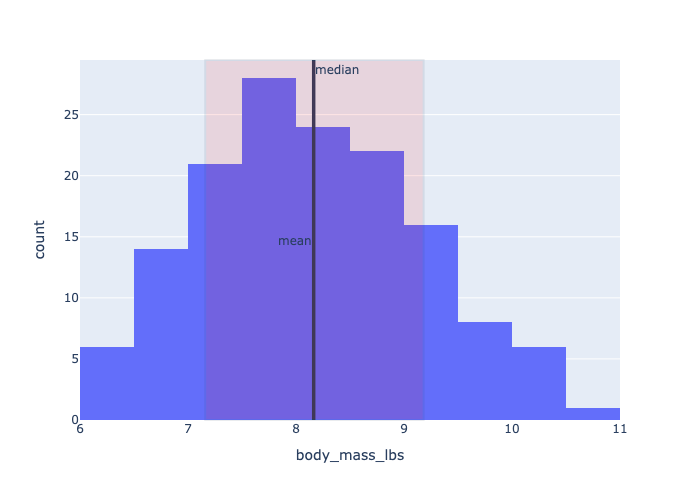

In [297]:
fig = px.histogram(df_adelie_body_mass_lbs, x='body_mass_lbs')
fig.add_vline(sample_mean, annotation_text='mean', annotation_position='left')
fig.add_vline(sample_median, annotation_text='median')
fig.add_vrect(x0=mean-sample_std, x1=mean+sample_std, fillcolor='red', opacity=0.1)
fig.show(renderer='png')

In [395]:
n_iterations = 1000
bootstrap_means = []
# Create an empty list for bootstrap medians and stds 
bootstrap_medians = []
bootstrap_stds = []

np.random.seed(42)


# Bootstrapping process
for _ in range(n_iterations):
    # Sample with replacement
    sample = df_adelie_body_mass_lbs.sample(n=len(df_adelie_body_mass_lbs), replace=True)
    # Calculate statistics
    bootstrap_means.append(sample.mean())
    bootstrap_medians.append(sample.median())
    bootstrap_stds.append(sample.std())

# Convert lists to NumPy arrays for easier calculations
bootstrap_means = np.array(bootstrap_means)
bootstrap_medians = np.array(bootstrap_medians)
bootstrap_stds = np.array(bootstrap_stds)

# Calculate 95% Confidence Intervals
mean_ci = np.percentile(bootstrap_means, [2.5, 97.5])
median_ci = np.percentile(bootstrap_medians, [2.5, 97.5])
std_ci = np.percentile(bootstrap_stds, [2.5, 97.5])

# Output the results
print("Bootstrap Means :", bootstrap_means.mean())
print("Bootstrap Mean 95% Confidence Interval:", mean_ci)
print("Bootstrap Mean Standard Error:", bootstrap_means.std())
print('\n')
print("Bootstrap Median mean:", bootstrap_medians.mean())
print("Bootstrap Median 95% Confidence Interval:", median_ci)
print("Bootstrap Median Standard Error:", bootstrap_medians.std())
print('\n')
print("Bootstrap Standard Deviation mean:", bootstrap_stds.mean())
print("Bootstrap Standard Deviation Confidence Interval:", std_ci)
print("Bootstrap Standard Deviation Standard Error:", bootstrap_stds.std())

Bootstrap Means : 8.174341191321783
Bootstrap Mean 95% Confidence Interval: [8.01346081 8.33100229]
Bootstrap Mean Standard Error: 0.08121100928747417


Bootstrap Median mean: 8.11656746031746
Bootstrap Median 95% Confidence Interval: [7.82627866 8.37742504]
Bootstrap Median Standard Error: 0.1317425598285228


Bootstrap Standard Deviation mean: 1.0023549893423707
Bootstrap Standard Deviation Confidence Interval: [0.90953378 1.09812944]
Bootstrap Standard Deviation Standard Error: 0.04826171935056167


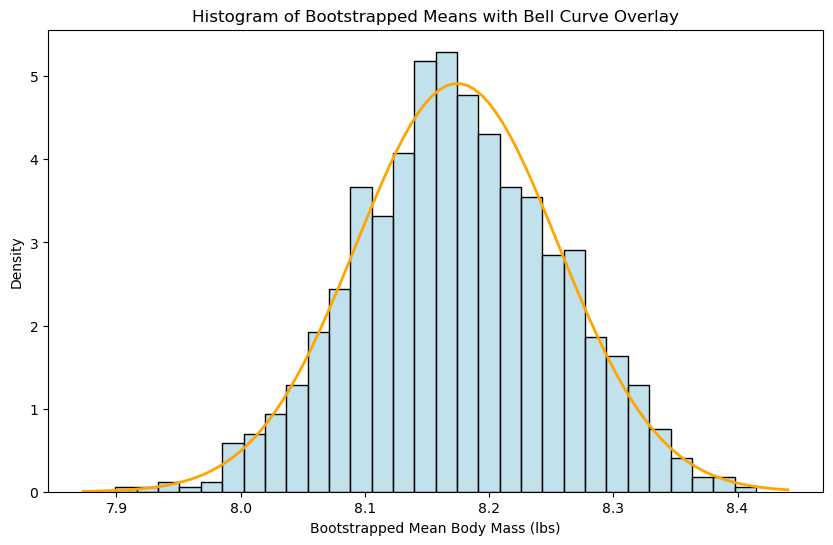

In [397]:
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=False, stat='density', color='lightblue', edgecolor='black')

# Fit a normal distribution to the data
mu, std = norm.fit(bootstrap_means)

# Create a range of x values for the bell curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Calculate the bell curve
p = norm.pdf(x, mu, std)

# Overlay the bell curve
plt.plot(x, p, linewidth=2, color='orange')

# Add labels and title
plt.title('Histogram of Bootstrapped Means with Bell Curve Overlay')
plt.xlabel('Bootstrapped Mean Body Mass (lbs)')
plt.ylabel('Density')

# Show the plot
plt.show()

# Chatbot Summaries 

## 1, 2


Summary of Interactions on Week 4 Statistics Homework
Bootstrapping Explanation:
Bootstrapping is a resampling technique used to estimate the distribution of a sample statistic by drawing multiple samples with replacement from the original dataset.
Steps include drawing resamples, computing the statistic for each, building the bootstrap distribution, and estimating the uncertainty using the standard deviation of the bootstrap sample means (Bootstrap SEM).
Comparison Between Standard Error of Mean (SEM) and Standard Deviation:
The Standard Deviation measures the spread of individual data points around the mean.
The Standard Error of the Mean measures the variability of the sample mean as an estimate of the population mean and decreases as sample size increases ...
​	
SEM is always smaller than the standard deviation and is used to construct confidence intervals.
Using SEM to Calculate a 95% Confidence Interval:
For normally distributed data, the formula is: ...

For small sample sizes, use a critical value from the t-distribution. For large samples, use the z-score (1.96 for 95%).
Example calculation provided using sample data to build a confidence interval.
Constructing a 95% Confidence Interval Using Bootstrapping:
No formulas needed. Steps involve drawing 1,000+ bootstrap samples, calculating the mean for each, sorting these means, and finding the 2.5th and 97.5th percentiles of the bootstrap means to form the confidence interval.
This provides an empirical CI without relying on SEM or t-scores.
Summary Format:
Key topics covered: Bootstrapping, Standard Error vs. Standard Deviation, and Confidence Interval Construction.
The interactions were focused on explaining concepts in a concise manner, along with step-by-step guidance and intuitive comparisons.